# Load data from csv files

In [2]:
import pandas as pd

burned_area = pd.read_excel('burn_data.xlsx', sheetname='Burned_Area')
temperature = pd.read_excel('burn_data.xlsx', sheetname='Temperature')
leaf_area = pd.read_excel('burn_data.xlsx', sheetname='Leaf_Area')

In [9]:
# Merge three csv files according to the column of 'system:index'
# 1. Merge "temperature" and "leaf_area" into temp_leaf by inner_join
# 2. Merge "burn_area" and temp_leaf into burned_temp_leaf by right_join
# If a csv file doesn't have matched 'system:index' value, the field value is 'nan'
# Reference link: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
temp_leaf = pd.merge(left=temperature, right=leaf_area, left_on='system:index', right_on='system:index') 
burned_temp_leaf = pd.merge(left=burned_area, right=temp_leaf, left_on='system:index', right_on='system:index')
print(burned_temp_leaf.columns)

Index(['system:index', 'BurnDate', 'FirstDay', 'LastDay', 'QA', 'Uncertainty',
       'ppt', 'tdmean', 'tmax', 'tmean', 'tmin', 'vpdmax', 'vpdmin', 'Fpar',
       'FparExtra_QC', 'FparLai_QC', 'FparStdDev', 'Lai', 'LaiStdDev'],
      dtype='object')


In [10]:
# Fill in 100 for the uncertainty of date has no fire
y = burned_temp_leaf['Uncertainty'].values.tolist()

# Prune the unuseful columns
del burned_temp_leaf['system:index']
del burned_temp_leaf['BurnDate']
del burned_temp_leaf['FirstDay']
del burned_temp_leaf['LastDay']
del burned_temp_leaf['QA']
del burned_temp_leaf['Uncertainty']
del burned_temp_leaf['FparExtra_QC']
del burned_temp_leaf['FparLai_QC']
del burned_temp_leaf['FparStdDev']
del burned_temp_leaf['LaiStdDev']

X = burned_temp_leaf.values.tolist()

In [8]:
print(X)
print(y)
#print(burned_temp_leaf.head())
#print(burned_temp_leaf[burned_temp_leaf.index == 1])
#print(burned_temp)
#index = 0
#print(burned_temp_leaf['vpdmin'][index])
#print(burned_temp_leaf['BurnDate'][index])
#print(burned_temp_leaf['tdmean'][index])
#print(burned_temp_leaf['Uncertainty'][index])
#print(burned_temp_leaf['system:index'][index])


[[0.016082143, 1.1813333, 18.934666, 13.6293335, 8.1595, 13.3455, 3.125375, 72.0, 20.0], [0.006968421, 3.6682, 20.321, 15.222709, 10.4004, 14.0995, 3.78925, 49.0, 12.0], [0.007334507, 2.1757143, 20.6834, 15.113001, 9.366678, 14.94345, 3.386175, 64.0, 14.0], [0.0014087592, 2.0673332, 20.37875, 14.6345005, 8.82375, 15.834091, 3.7995, 31.0, 5.0], [0.0050791367, 3.64, 20.389858, 13.9556675, 7.44875, 14.097, 2.2497084, 66.0, 17.0], [0.022724696, -0.8106667, 13.981334, 9.394401, 4.51725, 10.388429, 1.7820001, 48.0, 8.0], [0.0024785714, 3.2022, 20.910334, 14.910201, 8.8202, 16.3145, 3.44825, 44.0, 9.0], [0.0010920245, 4.8988, 22.6035, 16.636333, 10.562, 19.45575, 3.7572, 56.0, 12.0], [0.006664407, 6.2863336, 24.36625, 17.715502, 10.946, 17.0205, 3.2066, 60.0, 16.0], [0.004308772, 2.8049998, 21.60425, 15.2385845, 9.033, 15.7375, 3.295, 51.0, 11.0], [0.0041197184, 2.806025, 20.982876, 14.470251, 7.8335, 15.433, 2.76575, 57.0, 14.0], [0.00053583615, 4.4995418, 23.153, 16.636251, 9.8220005, 17.01

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [16]:
import numpy as np
np.mean(y_pred == y_test)
#print(y_pred)

0.15151515151515152

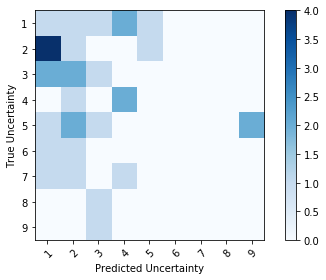

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test, y_pred)

# Only uses the labels that appear in the data
labels = unique_labels(y_test, y_pred)
#print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           ylabel='True Uncertainty',
           xlabel='Predicted Uncertainty')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()